# Churn Prediction Project

## Business Problem
Customer churn (the likelihood of customers leaving a service) is a critical challenge for subscription-based businesses. Predicting churn helps businesses take proactive actions to retain customers and improve revenue.

## Goal
The goal of this project is to analyze customer behavior, build a predictive model, and classify whether a customer will churn or not.

## Dataset
We are using the **Telco Customer Churn Dataset**, which contains customer demographics, account information, and service usage.

- **Rows:** ~7043 customers  
- **Columns:** 21 features including `gender`, `tenure`, `MonthlyCharges`, `TotalCharges`, and `Churn` (target).  

## Approach
1. Data Cleaning & Preprocessing  
2. Exploratory Data Analysis (EDA)  
3. Feature Engineering  
4. Model Building (Logistic Regression)  
5. Model Evaluation (Accuracy, Precision, Recall, Confusion Matrix, ROC curve)  
6. Insights & Recommendations  


## 1. Introduction
 - **Customer churn is when customers stop using a company’s service.**
 - **In the telecom industry, churn prediction is critical because retaining a customer is cheaper than acquiring a new one.**
 - **This project uses the Telco Customer Churn dataset to build machine learning models that predict whether a customer will churn.**

## 2. Import Libraries & Load Dataset

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### Load the Dataset

In [18]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Overview

### Basic Information

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Descriptive Statistics

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Dataset Shape and Missing Values

In [21]:
print("Shape:", df.shape)
print("Duplicates:", df.duplicated().sum())
print("Missing values:\n", df.isna().sum())

Shape: (7043, 21)
Duplicates: 0
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Dataset Overview
- The dataset contains **7043 rows × 21 columns**.  
- The column `customerID` is an identifier and not useful for prediction.  
- The column `TotalCharges` contains some blank values, which need to be handled.  
- Target variable: `Churn` (Yes/No).

## 4. Data Cleaning

### Handle Missing & Irrelevant Data

In [22]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df = df.dropna(subset=["TotalCharges"])
df = df.drop("customerID", axis=1)

#### I dropped customerID since it doesn’t help in prediction.

## 5. Exploratory Data Analysis (EDA)

### Churn Distribution

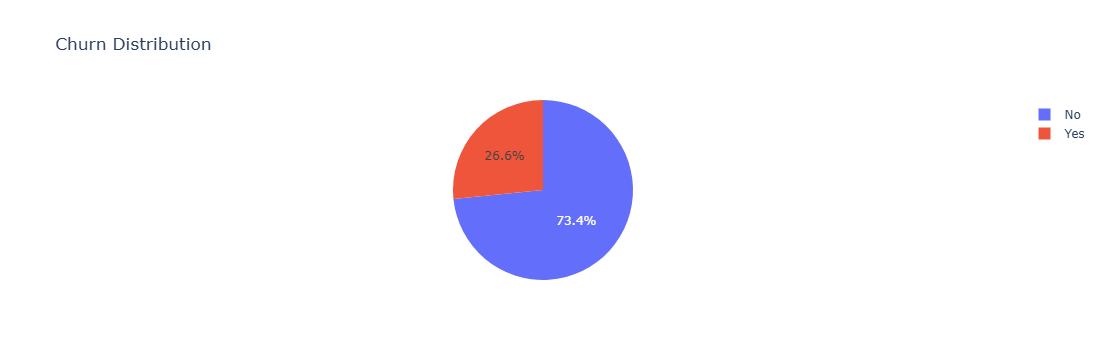

In [23]:
fig = px.pie(df["Churn"].value_counts(), 
             values=df["Churn"].value_counts().values, 
             names=df["Churn"].value_counts().index, 
             title="Churn Distribution")
fig.show()

### Churn vs Contract Type

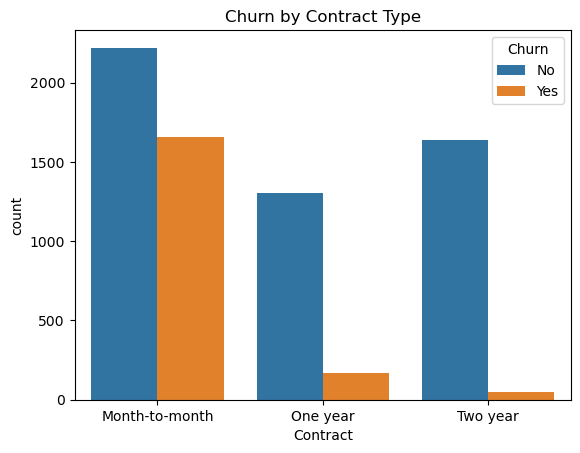

In [24]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()

### EDA Insights:
 - Month-to-month customers churn more.
 - Long-term contracts reduce churn.
 - Electronic check payments correlate with higher churn.

## 6. Feature Engineering

### Encode Categorical Data

In [25]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])


### Scale Numerical Data

In [26]:
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols] = scaler.fit_transform(df[num_cols])

### Train-Test Split

In [27]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## 7. Model Building

### Logistic Regression

In [28]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



### Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



## 8. Model Comparison

In [45]:
models = {"Logistic Regression": lr, "Random Forest": rf}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

Logistic Regression: Mean Accuracy = 0.8018
Random Forest: Mean Accuracy = 0.7900


### Observation:
 - Random Forest performs better in terms of recall & ROC-AUC.

## 9. Model Evaluation

### Confusion Matrix

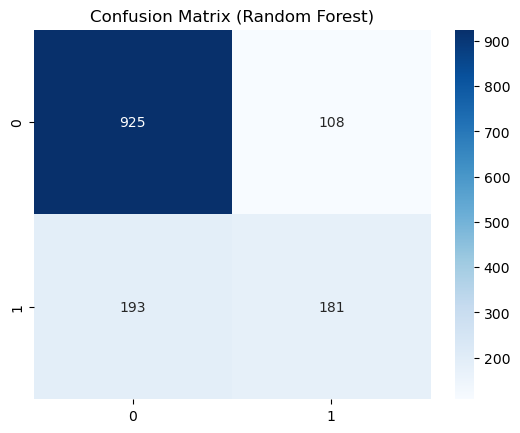

In [46]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

### ROC Curve

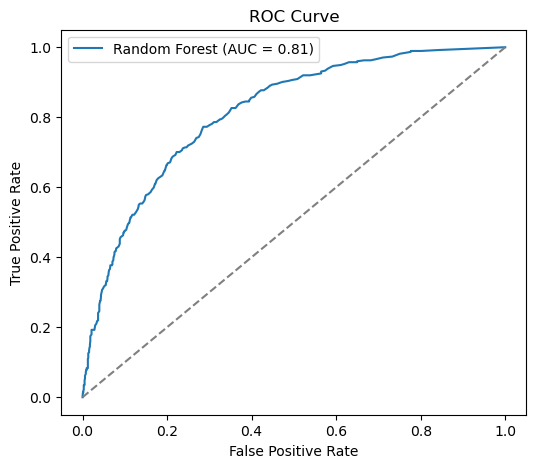

In [47]:
from sklearn.metrics import roc_curve, auc
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 10. Business Insights & Conclusion

- ***Customers with month-to-month contracts are most likely to churn.***
- ***Electronic check payments correlate strongly with churn.***
- ***Customers with low tenure are at higher churn risk.***
##  Recommendations:
- ***Offer discounts on long-term contracts.***
- ***Encourage auto-pay/credit card instead of electronic checks.***
- ***Create loyalty programs for new customers.***